In [3]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 946.4/946.4 kB 1.1 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd

from arch import arch_model

from arch.univariate import ARX, GARCH, ARCHInMean 

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

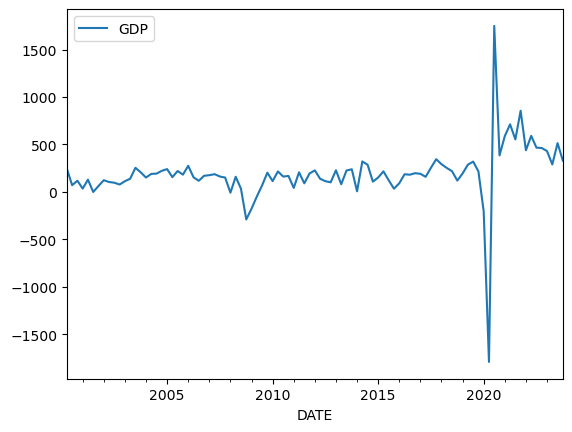

In [2]:
gdp = web.DataReader(name='GDP', data_source='fred', start='2000-01-01', end='2023-12-31')
y = gdp

y = gdp.diff().dropna()

y.plot()
plt.show()

In [3]:
am = arch_model(y, mean='ARX', lags=2, vol='GARCH', p=1, q=1, power=2)

res = am.fit()

res.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 2310.8277834739647
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1814.7099978351202
Iteration:      3,   Func. Count:     26,   Neg. LLF: 689.8810770860504
Iteration:      4,   Func. Count:     34,   Neg. LLF: 720.1994311641032
Iteration:      5,   Func. Count:     42,   Neg. LLF: 610.3347076071834
Iteration:      6,   Func. Count:     50,   Neg. LLF: 601.689507057952
Iteration:      7,   Func. Count:     57,   Neg. LLF: 601.0777585926733
Iteration:      8,   Func. Count:     64,   Neg. LLF: 601.0061019984661
Iteration:      9,   Func. Count:     71,   Neg. LLF: 600.9947008286056
Iteration:     10,   Func. Count:     78,   Neg. LLF: 600.9356904402841
Iteration:     11,   Func. Count:     85,   Neg. LLF: 600.6429983037442
Iteration:     12,   Func. Count:     92,   Neg. LLF: 599.2540510575816
Iteration:     13,   Func. Count:     99,   Neg. LLF: 594.8299398992679
Iteration:     14,   Func. Count:    106,   Neg. LLF: 593.11297

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                    GDP   R-squared:                      -0.391
Mean Model:                        AR   Adj. R-squared:                 -0.421
Vol Model:                      GARCH   Log-Likelihood:               -584.269
Distribution:                  Normal   AIC:                           1180.54
Method:            Maximum Likelihood   BIC:                           1195.73
                                        No. Observations:                   93
Date:                Fri, Nov 22 2024   Df Residuals:                       90
Time:                        21:12:52   Df Model:                            3
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
Const         29.0823     14.096      2.063  3.909e-02   [  1.455, 56.710]
GDP[1]         0.6118  8.650e-02      7.073  1.518e-12   [  0.442,  0.781]
GDP[2]         0.2841      0.102      2.778  5.465e-03 [8.367e-02,  0.484]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega       6155.8243   2683.985      2.294  2.182e-02  [8.953e+02,1.142e+04]
alpha[1]       1.0000      0.429      2.333  1.966e-02      [  0.160,  1.840]
beta[1]    6.1979e-16  4.406e-02  1.407e-14      1.000 [-8.635e-02,8.635e-02]
=============================================================================

Covariance estimator: robust
"""

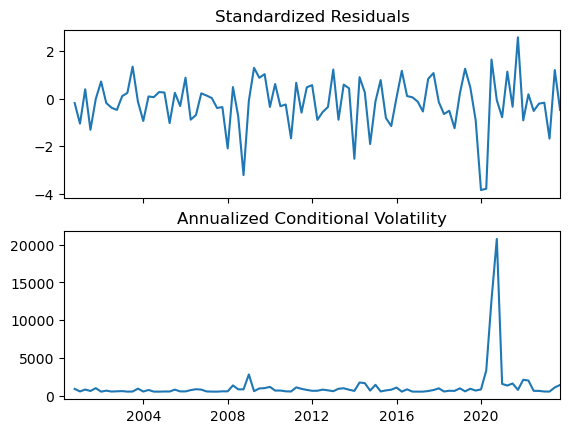

In [4]:
res.plot(annualize='W')
plt.show()

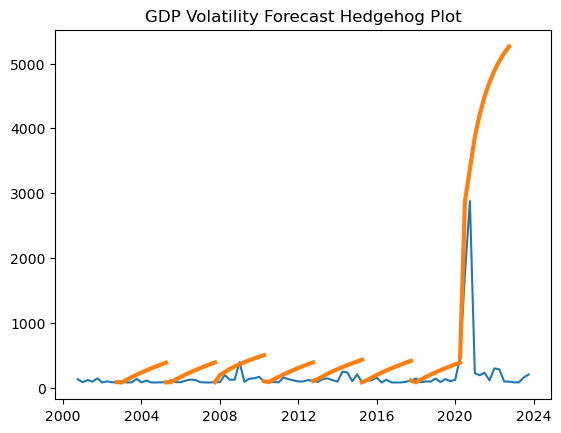

In [5]:
res.hedgehog_plot(plot_type='volatility')
plt.show()

In [6]:
res.arch_lm_test(lags=5)

ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 10.9553
P-value: 0.0523
Distributed: <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x134a77350>
WaldTestStatistic, id: 0x134b49e50

The $p$-value $>0.05$ $\Rightarrow$ there is no conditional heteroskedasticity

In [7]:
from sktime.forecasting.arch import ARCH
from sktime.utils.plotting import plot_series
# временной горизонт для прогнозирования
from sktime.forecasting.base import ForecastingHorizon

In [8]:
forecaster = ARCH(mean='AR', lags=1, vol='GARCH', p=1, q=1, power=2)  
forecaster.fit(y)

forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           AR - GARCH Model Results                           
==============================================================================
Dep. Variable:                   None   R-squared:                      -0.783
Mean Model:                        AR   Adj. R-squared:                 -0.803
Vol Model:                      GARCH   Log-Likelihood:               -595.864
Distribution:                  Normal   AIC:                           1201.73
Method:            Maximum Likelihood   BIC:                           1214.45
                                        No. Observations:                   94
Date:                Fri, Nov 22 2024   Df Residuals:                       92
Time:                        21:21:37   Df Model:                            2
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
Const         31.3328     16.972      1.846  6.487e-02 [ -1.932, 64.597]
None[1]        0.8689  7.474e-02     11.626  3.041e-31 [  0.722,  1.015]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega       9629.9416  1.298e+04      0.742      0.458 [-1.582e+04,3.508e+04]
alpha[1]       1.0000      0.425      2.354  1.856e-02      [  0.167,  1.833]
beta[1]    3.0071e-16      0.187  1.608e-15      1.000      [ -0.367,  0.367]
=============================================================================

Covariance estimator: robust
"""